In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

sns.set(style="whitegrid", font_scale=1.2)
print("Libraries imported!")

Libraries imported!


In [ ]:
df = pd.read_csv(r"C:\Users\neman\Desktop\Zara Customer Segmentation\Zara_sales_EDA.csv", sep=";")
print(f"Loaded {df.shape[0]:,} rows and {df.shape[1]} columns")
df.head(2)

Loaded 20,252 rows and 17 columns


,Product ID,Product Position,Promotion,Product Category,Seasonal,Sales Volume,brand,url,name,description,price,currency,terms,section,season,material,origin
0,185102,Aisle,Yes,clothing,Yes,1243,Zara,https://www.zara.com/us/en/basic-puffer-jacket...,BASIC PUFFER JACKET,Puffer jacket made of tear-resistant ripstop f...,78.99,USD,jackets,MAN,Winter,Polyester,Brazil
1,188771,Aisle,Yes,clothing,No,1429,Zara,https://www.zara.com/us/en/tuxedo-jacket-p0889...,TUXEDO JACKET,Straight fit blazer. Pointed lapel collar and ...,14.99,USD,jackets,MAN,Autumn,Cotton,Turkey


In [ ]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

df["sales_volume"] = pd.to_numeric(df["sales_volume"], errors="coerce")
df["price"] = pd.to_numeric(df["price"], errors="coerce")

df = df.dropna(subset=["sales_volume", "price"])
print(f"After cleaning → {df.shape[0]:,} rows")

After cleaning → 20,252 rows


In [ ]:
df["desc_length"] = df["description"].str.len()

q1 = df["price"].quantile(0.25)
q3 = df["price"].quantile(0.75)
df["price_category"] = np.where(df["price"] < q1, "Low",
                      np.where(df["price"] > q3, "High", "Medium"))

df["promotion"] = df["promotion"].map({"Yes":1, "No":0}).fillna(0).astype(int)
df["seasonal"]  = df["seasonal"].map({"Yes":1, "No":0}).fillna(0).astype(int)

print("Feature engineering done!")
print(df["desc_length"].describe())

Feature engineering done!
count    20250.000000
mean       132.668247
std         51.307073
min         14.000000
25%         92.000000
50%        132.000000
75%        168.000000
max        313.000000
Name: desc_length, dtype: float64


In [ ]:
cols_to_drop = ["url", "product_id", "name", "description", "brand", "currency", "product_category"]
df = df.drop(columns=cols_to_drop, errors="ignore")

print("Remaining columns → clean and ready:")
print(df.columns.tolist())

Remaining columns → clean and ready:
['product_position', 'promotion', 'seasonal', 'sales_volume', 'price', 'terms', 'section', 'season', 'material', 'origin', 'desc_length', 'price_category']


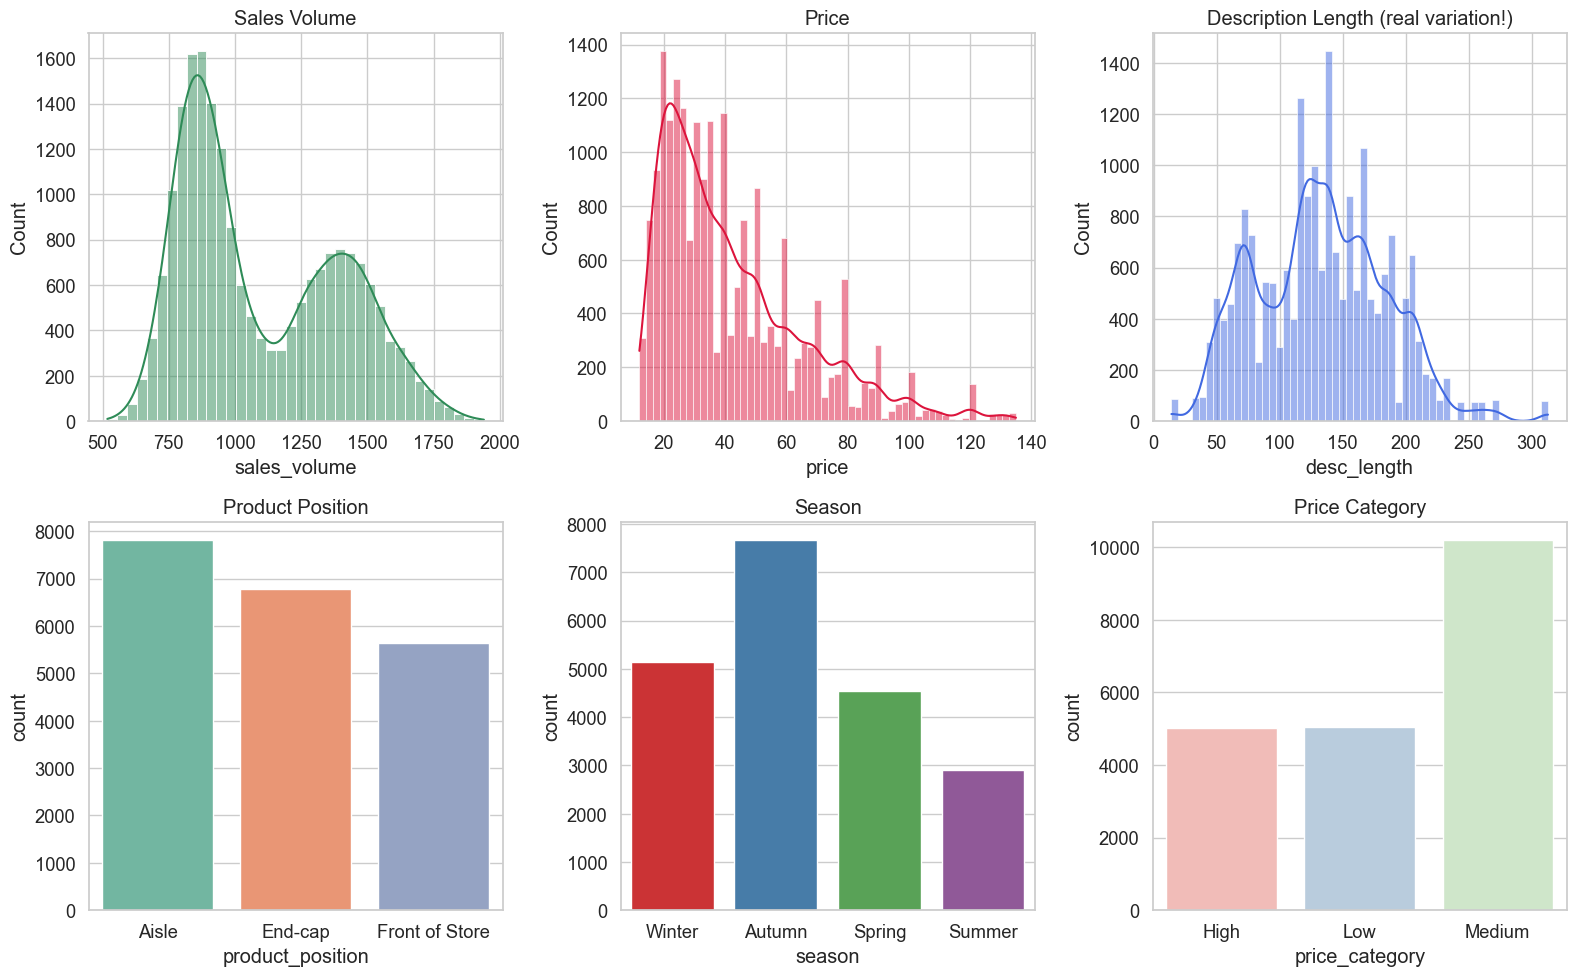

In [ ]:
plt.figure(figsize=(16,10))

plt.subplot(2,3,1)
sns.histplot(df["sales_volume"], kde=True, color="#2E8B57")
plt.title("Sales Volume")

plt.subplot(2,3,2)
sns.histplot(df["price"], kde=True, color="#DC143C")
plt.title("Price")

plt.subplot(2,3,3)
sns.histplot(df["desc_length"], kde=True, color="#4169E1")
plt.title("Description Length (real variation!)")

plt.subplot(2,3,4)
sns.countplot(data=df, x="product_position", hue="product_position", palette="Set2", legend=False)
plt.title("Product Position")

plt.subplot(2,3,5)
sns.countplot(data=df, x="season", hue="season", palette="Set1", legend=False)
plt.title("Season")

plt.subplot(2,3,6)
sns.countplot(data=df, x="price_category", hue="price_category", palette="Pastel1", legend=False)
plt.title("Price Category")

plt.tight_layout()
plt.show()

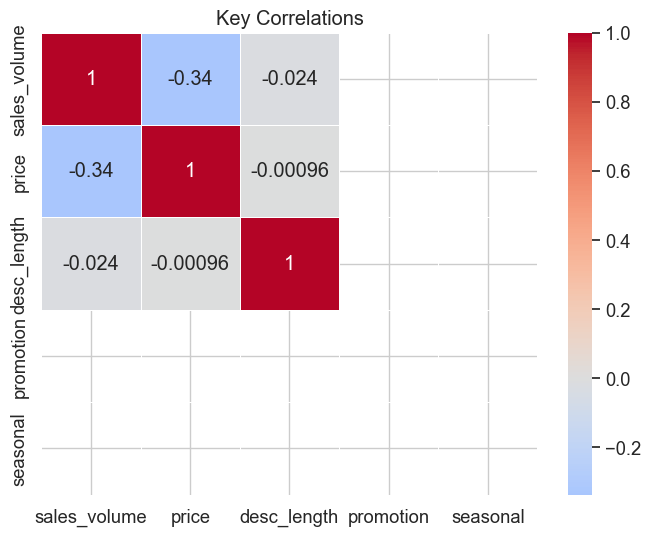

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df[["sales_volume","price","desc_length","promotion","seasonal"]].corr(),
            annot=True, cmap="coolwarm", center=0, linewidths=0.5)
plt.title("Key Correlations")
plt.show()

In [ ]:
cat_cols = ["product_position","terms","section","season","material","origin","price_category"]
df_final = pd.get_dummies(df, columns=cat_cols, drop_first=True)

num_cols = ["sales_volume", "price", "desc_length"]
scaler = StandardScaler()
df_final[num_cols] = scaler.fit_transform(df_final[num_cols])

print(f"Final dataset ready for clustering → {df_final.shape}")
df_final.head()

Final dataset ready for clustering → (20252, 38)


,promotion,seasonal,sales_volume,price,desc_length,product_position_End-cap,product_position_Front of Store,terms_jeans,terms_shoes,terms_sweaters,...,origin_China,origin_India,origin_Morocco,origin_Pakistan,origin_Portugal,origin_Spain,origin_Turkey,origin_Vietnam,price_category_Low,price_category_Medium
0,0,0,0.488217,1.584274,1.097961,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0,0,1.111902,-1.153063,0.688650,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
2,0,0,0.236731,1.283167,0.708141,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,0,0,0.840297,-0.468729,1.273379,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
4,0,0,1.691997,-0.810896,0.103921,True,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False


In [ ]:
df_final.to_csv("cleaned_data.csv", index=False)
df_final.to_excel("cleaned_data.xlsx", index=False)

df_human = df.copy()
df_human.to_excel("cleaned_data_human_readable.xlsx", index=False)

print("SUCCESS! All files saved:")
print("   • cleaned_data.csv")
print("   • cleaned_data.xlsx")
print("   • cleaned_data_human_readable.xlsx")

SUCCESS! All files saved:
   • cleaned_data.csv
   • cleaned_data.xlsx
   • cleaned_data_human_readable.xlsx
